<a href="https://colab.research.google.com/github/45prad/ml_7/blob/main/ML7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Pradip Garhwal

Roll No. : 21102B0010

BE CMPN B


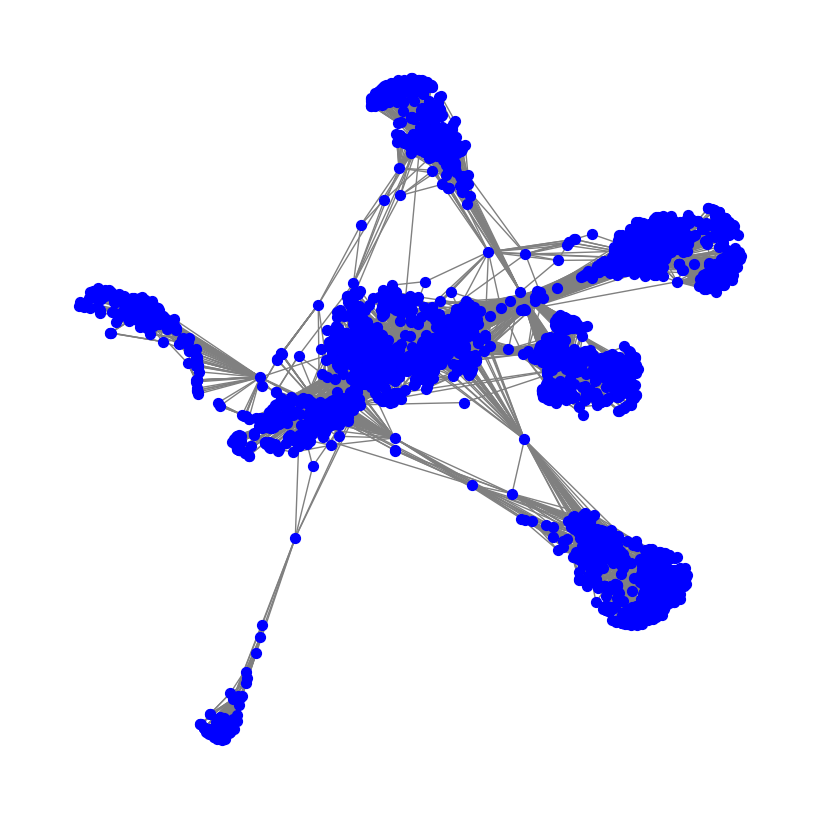

In [7]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from scipy.sparse import csr_matrix

# Load Facebook dataset (edges list)
url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
df = pd.read_csv(url, sep=' ', header=None, names=['node1', 'node2'])

# Construct a graph
G = nx.from_pandas_edgelist(df, 'node1', 'node2')

# Visualize the graph (optional)
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=50, node_color='blue', edge_color='gray', with_labels=False)
plt.show()

# Convert graph to adjacency matrix (sparse format)
adj_matrix = nx.adjacency_matrix(G)

# Ensure the matrix is in sparse format for Spectral Clustering
adj_matrix = csr_matrix(adj_matrix)



In [3]:
# Load Enron email dataset
url = 'https://www.cs.cmu.edu/~enron/enron_mail_20150507.tar.gz'
# You would need to extract the dataset after downloading it, here we'll assume the dataset is available
# If it's available locally, load it like this:
# df = pd.read_csv('path_to_email_dataset.csv')

# Preprocess the dataset (construct a similarity graph based on interaction frequency)
# For simplicity, let's assume 'sender' and 'receiver' columns are present
# df = pd.DataFrame({'sender': [...], 'receiver': [...]})
# Constructing a graph from sender-receiver pairs

# G_enron = nx.from_pandas_edgelist(df, 'sender', 'receiver')

# Adjacency matrix for the Enron email dataset
# adj_matrix_enron = nx.to_scipy_sparse_matrix(G_enron)


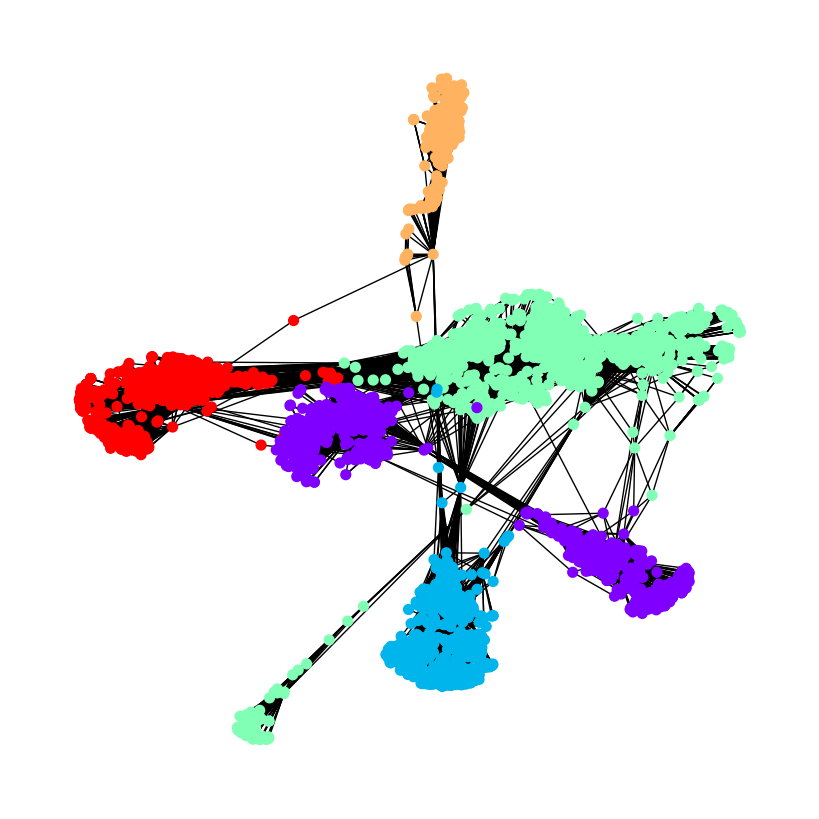

In [4]:
# Define the number of clusters
n_clusters = 5  # Adjust as necessary

# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans')

# Fit the model
sc.fit(adj_matrix)

# Predict cluster labels
labels = sc.labels_

# Visualize clustering (optional for Facebook dataset)
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=labels, node_size=50, cmap=plt.cm.rainbow, with_labels=False)
plt.show()


In [5]:
# Compute Silhouette Score
silhouette_avg = silhouette_score(adj_matrix, labels, metric='precomputed')
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: -1.0
